<a href="https://colab.research.google.com/github/yashhbeladiya/freegamescout/blob/main/term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

This exercise starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [ ]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-documents/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2025-01-30 20:55:14--  https://github.com/dasmiq/cs6200-documents/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-documents/raw/refs/heads/main/ap201001.json.gz [following]
--2025-01-30 20:55:15--  https://github.com/dasmiq/cs6200-documents/raw/refs/heads/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-documents/refs/heads/main/ap201001.json.gz [following]
--2025-01-30 20:55:15--  https://raw.githubusercontent.com/dasmiq/cs6200-documents/refs/heads/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

We convert this file with one JSON record on each line to a list of dictionaries.

In [ ]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [ ]:
terms[1:10]

[{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'academy',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'accused',
  'count': 2},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'actress',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'ad', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'after', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agenda',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agreed',
  'count': 1}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [ ]:
# TODO: Print the 10 terms from document APW_ENG_20100101.0001 with the highest count.
import pandas as pd
df = pd.DataFrame(terms)
top_10 = df.nlargest(10, 'count')
print(top_10)

                           id field term  count
453067  APW_ENG_20100107.0183  body  the    149
445595  APW_ENG_20100107.0114  body  the    104
377799  APW_ENG_20100106.0834  body  the    102
378541  APW_ENG_20100106.0839  body  the    102
385416  APW_ENG_20100106.0913  body  the    102
385985  APW_ENG_20100106.0915  body  the    102
396868  APW_ENG_20100106.1032  body  the    102
397896  APW_ENG_20100106.1037  body  the    102
163124  APW_ENG_20100104.0648  body  the    101
164302  APW_ENG_20100104.0660  body  the    101


In [ ]:
# TODO: Print the 10 terms with the highest total count in the corpus.
top_10 = df.groupby('term')['count'].sum().nlargest(10)

print(top_10)

term
the     62216
to      26931
in      25659
a       23383
of      22326
and     22125
said    10888
for      9716
on       9382
that     8942
Name: count, dtype: int64


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [ ]:
# TODO: Compute the number of distinct documents in the collection.
N = len(df['id'].unique())
print(N)

# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.
df_per_term = df.groupby('term')['id'].nunique().to_dict()

2778


In [ ]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.
print(df_per_term['the'] / N)

0.9704823614110871


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [ ]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
import numpy as np
tfidf_terms = None

df['tfidf'] = np.log(df['count'] + 1) * np.log(N / df["term"].map(df_per_term))
tfidf_terms = df

df.head()

,id,field,term,count,tfidf
0,APW_ENG_20100101.0001,body,a,16,0.219394
1,APW_ENG_20100101.0001,body,about,1,0.656793
2,APW_ENG_20100101.0001,body,abuse,1,3.237961
3,APW_ENG_20100101.0001,body,academy,1,3.419818
4,APW_ENG_20100101.0001,body,accused,2,2.885155


In [ ]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values.
top_20 = df.nlargest(20, 'tfidf')
print(top_20)

                           id field         term  count      tfidf
52727   APW_ENG_20100103.0028  body      guarani     24  23.292878
199263  APW_ENG_20100105.0061  body   nomination     95  22.519372
234566  APW_ENG_20100105.0446  body      methane     15  21.985205
48925   APW_ENG_20100103.0015  body       kheire     14  21.473448
192483  APW_ENG_20100105.0014  body    greyhound     14  21.473448
433679  APW_ENG_20100107.0036  body  shakespeare     18  21.306960
199179  APW_ENG_20100105.0061  body        guild     28  20.667543
342740  APW_ENG_20100106.0428  body  shakespeare     16  20.502093
21195   APW_ENG_20100102.0197  body      elkhart     12  20.338731
305769  APW_ENG_20100106.0075  body        magna     12  20.338731
426716  APW_ENG_20100106.1325  body       sutton     20  19.920895
107822  APW_ENG_20100104.0043  body        tohti     11  19.704034
192485  APW_ENG_20100105.0014  body   greyhounds     11  19.704034
430676  APW_ENG_20100107.0018  body        krewe     11  19.70

## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [ ]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
term_frequencies = df.groupby("term")["count"].sum().sort_values(ascending=False)
frequency = term_frequencies.to_list()

print(frequency)

[62216, 26931, 25659, 23383, 22326, 22125, 10888, 9716, 9382, 8942, 7791, 6317, 6283, 6078, 5874, 5357, 5094, 4746, 4641, 4355, 4087, 4012, 3904, 3693, 3638, 3567, 3518, 3478, 3320, 3218, 3063, 2955, 2904, 2900, 2876, 2816, 2423, 2331, 2263, 2241, 2225, 2136, 2097, 2076, 2059, 2003, 1966, 1917, 1898, 1897, 1851, 1826, 1807, 1761, 1748, 1722, 1717, 1680, 1678, 1677, 1659, 1628, 1626, 1622, 1514, 1497, 1460, 1460, 1402, 1266, 1261, 1244, 1236, 1236, 1221, 1215, 1195, 1187, 1179, 1144, 1123, 1107, 1095, 1069, 1067, 1064, 1058, 1057, 1036, 1014, 992, 992, 984, 983, 972, 965, 962, 961, 946, 942, 924, 917, 916, 914, 911, 886, 878, 868, 866, 858, 846, 841, 839, 836, 831, 820, 811, 802, 790, 781, 777, 776, 773, 760, 759, 755, 754, 752, 751, 751, 745, 742, 740, 735, 735, 724, 718, 712, 708, 706, 703, 694, 684, 683, 676, 675, 667, 666, 664, 663, 661, 650, 649, 648, 643, 640, 638, 627, 621, 611, 599, 596, 593, 592, 591, 584, 583, 583, 578, 575, 572, 572, 571, 570, 566, 564, 560, 557, 555, 552, 55

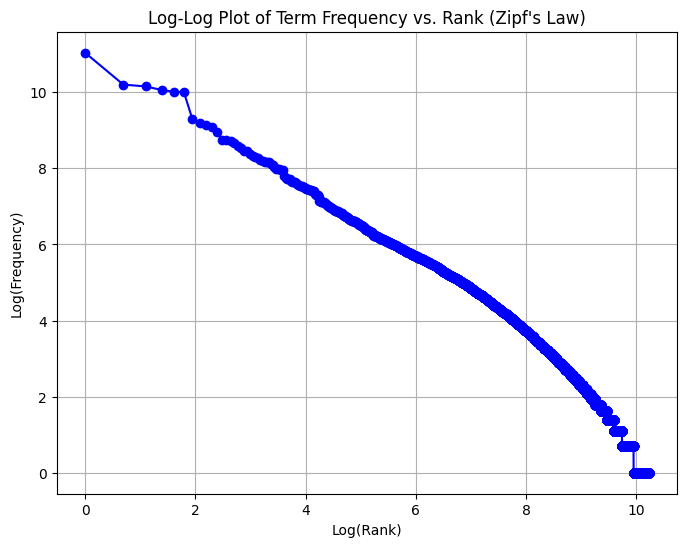

In [ ]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.
ranks = np.arange(1, len(frequency) + 1)
log_ranks = np.log(ranks)
log_frequencies = np.log(frequency)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(log_ranks, log_frequencies, marker='o', linestyle='-', color='b')
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.title("Log-Log Plot of Term Frequency vs. Rank (Zipf's Law)")
plt.grid(True)
plt.show()

In [ ]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.
ntokens = df['count'].sum()
print(ntokens)

1000000


In [ ]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.
top_10_words = term_frequencies.head(10)
top_10_proportion = top_10_words.sum() / ntokens
print(top_10_proportion)

0.221568


In [ ]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.
unique_words = term_frequencies[term_frequencies == 1]
unique_proportion = unique_words.sum() / ntokens
print(unique_proportion)

0.006641


## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll explore acquiring new data.

One common way of acquiring data is through application programming interfaces (APIs) to various databases. The Library of Congress's [_Chronicling America_](https://chroniclingamerica.loc.gov/) site aggregates digitized US newspapers from the past two hundred years, such as the [_Seattle Star_](https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1/seq-1/) from 100 years ago.

You can use [the API](https://chroniclingamerica.loc.gov/about/api/) to retrieve JSON data listing all issues of the _Seattle Star_: https://chroniclingamerica.loc.gov/lccn/sn87093407.json

Note the list in the `issues` field. For example, here is the record for the January 17, 1925, issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1.json

In that issue record, you'll see records for each page, e.g.: https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1/seq-1.json

And inside that page record, you'll see links to data about that page in various data formats, such as JPEG, PDF, and plain text, which is what we want here: https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1/seq-1/ocr.txt

This plain text was transcribed from the old page images using optical character recognition (OCR) models, and so contains errors.

Your task is to acquire and analyze the issues of the _Seattle Star_ from the month of January, 1925, i.e., the issues with a date field that starts with `1925-01`. This should be about the same amount of data as the million words from the Associated Press you analyzed in the last section.

**TODO**: Write code that calls the _Chronicling America_ API to download and extract the text from the _Seattle Star_ from January 1925. You can use the `json` library from above and any other libraries you wish to fetch data from URLs. As you would when working with any production API, you may need to limit your rate of requests.

In [3]:
# TODO: Data acquisition code here.
import requests
import time
import json

BASE_URL = "https://chroniclingamerica.loc.gov/lccn/sn87093407.json"

# Fetch newspaper metadata
response = requests.get(BASE_URL)

# Check for valid response status code before attempting to decode JSON
if response.status_code == 200:  # 200 means OK
    data = response.json()
else:
    print(f"Error fetching data: Status code {response.status_code}. Response: {response.text}")

# get all issues
issues = data["issues"]

# Filter issues from January 1925
jan_1925_issues = [issue for issue in issues if issue["date_issued"].startswith("1925-01")]

# List to store extracted text
corpus_texts = []

# iterate over Jan 2025 issues
for issue in jan_1925_issues:
    issue_url = issue["url"]
    issue_response = requests.get(issue_url)

    # Check for rate limiting and handle it
    if issue_response.status_code == 429:  # Too Many Requests
        print("Rate limited! Waiting for 60 seconds...")
        time.sleep(60)  # Wait for a minute before retrying
        issue_response = requests.get(issue_url)

    # Check for valid response status code
    if issue_response.status_code == 200:
        issue_data = issue_response.json()

        # Iterate over pages in the store
        for page in issue_data["pages"]:
            page_response = requests.get(page['url'])

             # Check for rate limiting and handle it
            if page_response.status_code == 429:  # Too Many Requests
                print("Rate limited! Waiting for 60 seconds...")
                time.sleep(60)  # Wait for a minute before retrying
                page_response = requests.get(page['url']) # Retry the request

            # Now check if the response is successful after potential retry
            if page_response.status_code == 200:
                page_data = page_response.json()
                page_text_url = page_data['text']

                # Fetch the text from the page
                page_text_response = requests.get(page_text_url)

                # Similar rate limiting check for text fetching
                if page_text_response.status_code == 429:
                    print("Rate limited! Waiting for 60 seconds...")
                    time.sleep(60)
                    page_text_response = requests.get(page_text_url)  # Retry

                if page_text_response.status_code == 200:
                    page_text = page_text_response.text
                    corpus_texts.append(page_text)
                else:
                    print(f"Failed to fetch text from {page_text_url}. Status code: {page_text_response.status_code}")


            else:
                print(f"Failed to fetch page data from {page['url']}. Status code: {page_response.status_code}")

            time.sleep(10)

    else:
        print(f"Failed to fetch data from {issue_url}. Status code: {issue_response.status_code}")

    # Introduce a delay to avoid overwhelming the server
    time.sleep(10)

# Combine all text into a single corpus
corpus = "\n".join(corpus_texts)

# Save corpus to a text file
with open("seattle_star_jan_1925.txt", "w", encoding="utf-8") as file:
    file.write(corpus)

print(f"Extracted {len(jan_1925_issues)} issues and {len(corpus_texts)} pages from January 1925.")

Extracted 27 issues and 492 pages from January 1925.


**TODO**: Write code to tokenize the text and count the resulting terms in each document. Since this data comes from automatically transcribing printed pages, some words may be hyphenated across line breaks. There is more than one right way to tokenize this data, so add comments to your code documenting your choices.

In [8]:
import re
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK tokenizer
nltk.download('punkt')

def preprocess_text(text):
    """
    Cleans and tokenizes input text.

    Steps:
    1. Fixes hyphenated words across line breaks (e.g., "com-\nputer" → "computer").
    2. Removes extra newlines.
    3. Tokenizes text using NLTK's word_tokenize (splits punctuation properly).
    4. Converts all tokens to lowercase.
    5. Removes non-alphanumeric tokens (optional: keeps only words & numbers).
    """

    # Fix hyphenated words split across lines
    text = re.sub(r"-\n", "", text)  # Removes hyphen + newline

    # Remove excess newlines
    text = re.sub(r"\n+", " ", text)

    # Tokenize using NLTK
    tokens = word_tokenize(text)

    # Convert all tokens to lowercase
    tokens = [word.lower() for word in tokens]

    # Remove non-alphanumeric tokens (optional: keeps only words and numbers)
    tokens = [word for word in tokens if word.isalnum()]

    return tokens

# Read the file
with open("seattle_star_jan_1925.txt", "r", encoding="utf-8") as file:
    document_text = file.read()

# Process the document
tokens = preprocess_text(document_text)

# Count word occurrences
term_counts = Counter(tokens)

# Print top 10 most common words
print("Top 10 Terms in Document:")
print(dict(term_counts.most_common(10)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 Terms in Document:
{'the': 69516, 'of': 38907, 'and': 36703, 'a': 26889, 'to': 25712, 'in': 23691, 'i': 19495, 'for': 14409, 'e': 12304, 'at': 10689}


**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above.

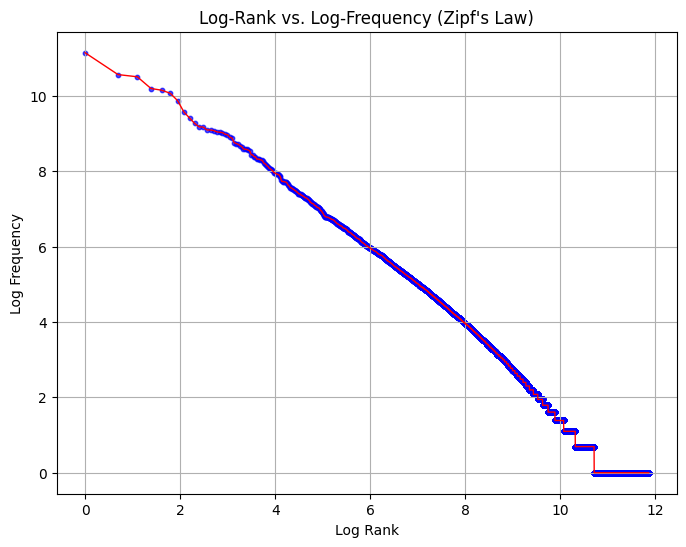

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get sorted word frequencies (descending order)
sorted_terms = term_counts.most_common()
frequencies = [count for _, count in sorted_terms]  # Extract only counts

# Generate ranks (1, 2, 3, ... based on frequency order)
ranks = np.arange(1, len(frequencies) + 1)

# Compute log values
log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

# Plot Zipf's Law graph
plt.figure(figsize=(8, 6))
plt.scatter(log_ranks, log_frequencies, alpha=0.7, color='blue', s=10)  # Scatter plot
plt.plot(log_ranks, log_frequencies, color='red', linewidth=1)  # Line plot for better visualization

# Labels and title
plt.xlabel("Log Rank")
plt.ylabel("Log Frequency")
plt.title("Log-Rank vs. Log-Frequency (Zipf's Law)")
plt.grid(True)
# Show plot
plt.show()

**TODO**: What do you observe about the differences between the distributions of the Associated Press and Seattle Star collections? In this text box, give some possible reasons for these differences.

-